# View pickles star SED

In [60]:
# Import some generally useful packages

import os
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx
%matplotlib inline
import pandas as pd
from astropy.io import fits

In [2]:
# Import the primary photometry classes from rubin_sim.photUtils
from rubinsimphot.phot_utils import Bandpass, Sed
from rubinsimphot.data.data_sets import  get_data_dir

## Config

### Find where are the data

In [3]:
# Find the throughputs directory 
#fdir = os.getenv('RUBIN_SIM_DATA_DIR')
fdir = get_data_dir()
if fdir is None:  #environment variable not set
    fdir = os.path.join(os.getenv('HOME'), 'rubin_sim_data')



#### definition of path

In [4]:
fauxteldir = os.path.join(fdir, 'throughputs', 'auxtel')
flsstdir = os.path.join(fdir, 'throughputs', 'baseline')
seddir = os.path.join(fdir, 'pysynphot', 'pickles')

In [5]:
#!ls $flsstdir

In [6]:
#!ls $fauxteldir

#### Read the throughput curves

In [7]:
filterlist = ['u', 'g', 'r', 'i', 'z', 'y']
filtercolors = {'u':'b', 'g':'c', 'r':'g', 'i':'orange', 'z':'r', 'y':'m'}

In [8]:
lsst = {}
for f in filterlist:
    lsst[f] = Bandpass()
    lsst[f].read_throughput(os.path.join(flsstdir, f'hardware_{f}.dat'))

In [9]:
auxtel = {}
for f in filterlist:
    auxtel[f] = Bandpass()
    auxtel[f].read_throughput(os.path.join(fauxteldir, f'auxtel_sdss_{f}p_total.dat'))

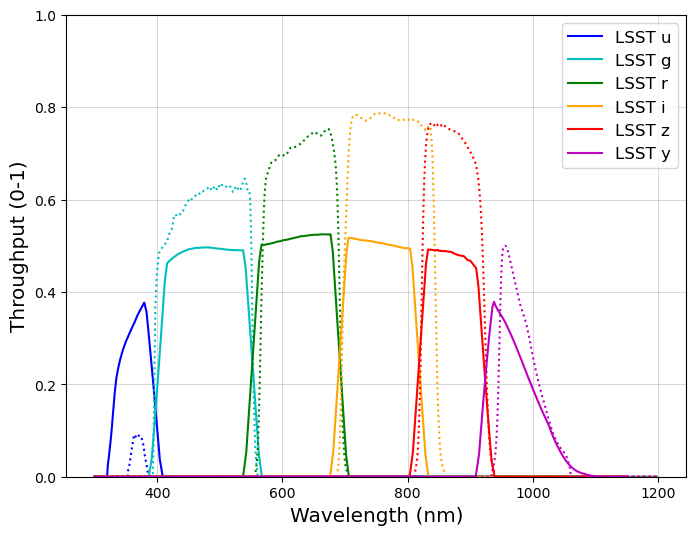

In [10]:
# Plot the curves .. see what we have. 
filtercolors = {'u':'b', 'g':'c', 'r':'g', 'i':'orange', 'z':'r', 'y':'m'}

plt.figure(figsize=(8,6))
for f in filterlist:
    plt.plot(lsst[f].wavelen, lsst[f].sb, color=filtercolors[f], label=f"LSST {f}")
    plt.plot(auxtel[f].wavelen, auxtel[f].sb,':' ,color=filtercolors[f])
plt.xlabel("Wavelength (nm)", fontsize='x-large')
plt.ylabel("Throughput (0-1)", fontsize='x-large')
plt.ylim(0, 1)
plt.grid(True, alpha=0.3, color='gray')
plt.legend(loc='upper right', fancybox=True, fontsize='large')

## SED

In [11]:
! ls $seddir

AA_README dat_uvi   dat_uvk


In [12]:
seddir_uvi = os.path.join(seddir,"dat_uvi")
seddir_uvk = os.path.join(seddir,"dat_uvk")

In [16]:
all_pickles_uvi = sorted(os.listdir(seddir_uvi))
all_pickles_uvk = sorted(os.listdir(seddir_uvk))

In [19]:
#all_pickles_uvi

In [21]:
file_ref = os.path.join(seddir_uvi, "pickles.fits")

In [22]:
hdul = fits.open(file_ref)

In [23]:
#hdul.info()
#hdul[0].header

Filename: /Users/dagoret/MacOSX/GitHub/LSST/AtmosphericSimulation/rubinsimphot/src/rubin_sim_data/pysynphot/pickles/dat_uvi/pickles.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      10   ()      
  1                1 BinTableHDU     14   131R x 2C   [40A, 12A]   


In [29]:
df = pd.DataFrame(hdul[1].data)

In [54]:
df.head()

,FILENAME,SPTYPE
0,pickles_1,O5V
1,pickles_2,O9V
2,pickles_3,B0V
3,pickles_4,B1V
4,pickles_5,B3V


In [58]:
NSED = len(df)

In [62]:
# wavelength bin colors
jet = plt.get_cmap('jet')
cNorm = mpl.colors.Normalize(vmin=0, vmax=NSED)
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=jet)
all_colors = scalarMap.to_rgba(np.arange(NSED), alpha=1)

(3000.0, 10500.0)

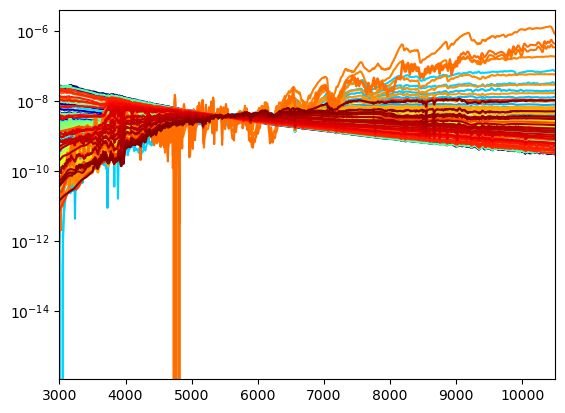

In [68]:

for index in np.arange(NSED):
    filename = df.loc[index,"FILENAME"].strip()+".fits"
    fullfilename = os.path.join(seddir_uvi,filename) 
    hdul = fits.open(fullfilename)
    dff = pd.DataFrame(hdul[1].data)
    plt.plot(dff.WAVELENGTH,dff.FLUX,color=all_colors[index])
plt.yscale('log')
plt.xlim(3000.,10500)
    